# **Primera Entrega Trabajo Final**

**Abstract**

Conjunto referente a los datos de Turismo Receptivo, obtenidos a través de la encuesta de Turismo Receptivo, este conjunto contiene la información desagregada de visitantes y el gasto de los mismos referente a cada trimestre desde el año 2016 en adelante. La información que se encuentra detallada es sobre; destino principal del viaje, rubro del gasto, nacionalidad de los visitantes, principal alojamiento utilizado, principal motivo del viaje.

El análisis de los datos del turismo receptivo en Uruguay ayudará a identificar patrones claves
para diseñar estrategias de publicidad y promoción del turismo uruguayo en el exterior. Se
pondrá especial atención en el comportamiento de los visitantes, influido por factores como la
nacionalidad, destino interno, modalidad de viaje, puerto de ingreso, entre otros. Estos factores
contribuirán a revelar oportunidades de mejora, permitiendo la personalización de campañas
con un objetivo claro: el incremento anual de turistas extranjeros.

**Preguntas e Hipótesis**

Pregunta 1: ¿Cuál es el país de origen que más turistas aporta a Uruguay y cómo ha cambiado a lo largo de los años?
Hipótesis 1: La mayoría de los turistas que visitan Uruguay provienen de países vecinos como Argentina y Brasil, y esta tendencia ha sido consistente a lo largo de los años.

Pregunta 2: ¿Cuál es el gasto promedio de los turistas según su nacionalidad?
Hipótesis 2: Los turistas provenientes de países desarrollados tienen un gasto promedio mayor en comparación con aquellos provenientes de países en desarrollo.

Pregunta 3: ¿Cuál es el principal motivo del viaje y cómo varía según la nacionalidad de los visitantes?
Hipótesis 3: La mayoría de los turistas visitan Uruguay por motivos de vacaciones y recreación, independientemente de su país de origen.

Pregunta 4: ¿Cómo varía el gasto total de los turistas según el trimestre del año?
Hipótesis 4: Los trimestres que coinciden con las temporadas altas (verano y fin de año) presentan un gasto total significativamente mayor comparado con otros trimestres.








In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset en un DataFrame
url = 'https://raw.githubusercontent.com/randres6/Coderhouse/main/turismoreceptivo.csv'  # Reemplaza esta URL con la ubicación real de tu archivo
data = pd.read_csv(url)

# Convertir las columnas de fecha a datetime
data['FechaIngreso'] = pd.to_datetime(data['FechaIngreso'])
data['FechaEgreso'] = pd.to_datetime(data['FechaEgreso'])

# Extraer el año y el trimestre de la fecha de ingreso
data['AñoIngreso'] = data['FechaIngreso'].dt.year
data['TrimestreIngreso'] = data['FechaIngreso'].dt.quarter

# Mostrar las primeras filas para verificar
data.head()







,IdIngresos,Lugar Ingreso,IdTranspIngreso,Transporte Internacional de Ingreso,FechaIngreso,IdFecIng,FechaEgreso,IdFecEgr,IdNacionalidad,Pais,...,GastoAlimentacion,GastoTransporte,GastoCultural,GastoTours,GastoCompras,GastoOtros,Coef,CoefTot,AñoIngreso,TrimestreIngreso
0,3,Aeropuerto de Carrasco,1,Aereo,2017-02-22,13567,2017-03-03,13576,33,Ecuador,...,1134.0,0.0,0.0,0.0,0.0,513.0,129.35,388.04,2017,1
1,18,Rio Branco,2,Terrestre Auto,2017-01-05,13519,2017-01-09,13523,19,Brasil,...,376.0,72.0,384.0,0.0,0.0,400.0,57.49,114.98,2017,1
2,3,Aeropuerto de Carrasco,1,Aereo,2017-01-04,13518,2017-01-12,13526,30,Paraguay,...,752.0,160.0,0.0,0.0,566.0,800.0,63.94,127.89,2017,1
3,7,Fray Bentos,2,Terrestre Auto,2017-01-18,13532,2017-01-26,13540,30,Paraguay,...,1128.0,216.0,0.0,0.0,0.0,0.0,53.25,159.76,2017,1
4,7,Fray Bentos,2,Terrestre Auto,2017-01-02,13516,2017-01-17,13531,10,Argentina,...,1410.0,270.0,0.0,0.0,566.0,1500.0,142.84,285.68,2017,1


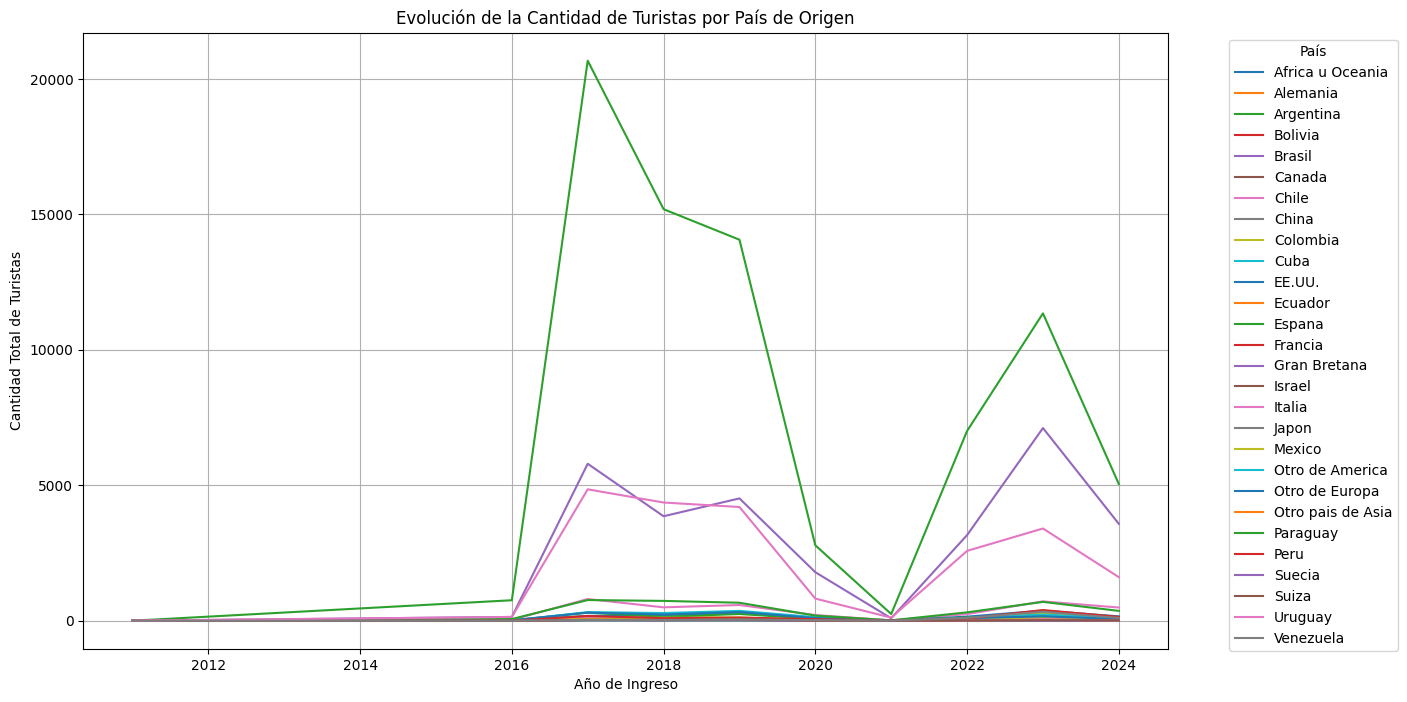

In [12]:
# Calcular la cantidad total de turistas por país y año
turistas_por_pais_año = data.groupby(['AñoIngreso', 'Pais'])['Gente'].sum().unstack().fillna(0)

# Graficar la evolución de los turistas por país a lo largo de los años
plt.figure(figsize=(14,8))
turistas_por_pais_año.plot(kind='line', ax=plt.gca())
plt.title('Evolución de la Cantidad de Turistas por País de Origen')
plt.xlabel('Año de Ingreso')
plt.ylabel('Cantidad Total de Turistas')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
